In [11]:
# Loading Data
import pandas as pd
import numpy as np
import nltk
import string
import re
import time

# Data Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.utils import resample
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer

# Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score

# Model Evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
#from scikitplot.metrics import plot_roc, plot_confusion_matrix

# Explore Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS
from matplotlib.pyplot import rcParams

from sklearn.feature_extraction.text import CountVectorizer

In [4]:
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')

In [5]:
train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [6]:
test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [7]:
train.isnull().sum()

lang_id    0
text       0
dtype: int64

In [8]:
test.isnull().sum()

index    0
text     0
dtype: int64

In [9]:
ftrain = train.copy()
ftest = test.copy()

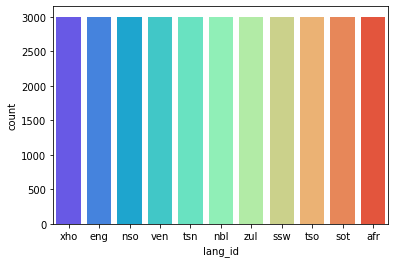

In [12]:
sns.countplot(x='lang_id',data=ftrain,palette='rainbow')

In [13]:
ftrain.lang_id.value_counts()

sot    3000
ven    3000
zul    3000
tso    3000
afr    3000
nso    3000
ssw    3000
eng    3000
xho    3000
nbl    3000
tsn    3000
Name: lang_id, dtype: int64

In [16]:
ftrain.shape,ftest.shape

((33000, 2), (5682, 2))

In [17]:
ftrain.columns

Index(['lang_id', 'text'], dtype='object')

# Base model

In [41]:
from sklearn.model_selection import train_test_split

X = ftrain['text']
y = ftrain['lang_id']

In [42]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=2)
X_vectorized = vectorizer.fit_transform(X)

In [43]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=2)
y_vectorized = vectorizer.fit_transform(y)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_vectorized, test_size=0.33, random_state=42)

In [48]:
y_vectorized

<33000x11 sparse matrix of type '<class 'numpy.float64'>'
	with 33000 stored elements in Compressed Sparse Row format>

Train the model

In [45]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [46]:
nb.fit(X_train,y_train)

ValueError: y should be a 1d array, got an array of shape () instead.

SVC

In [ ]:
lsvc = LinearSVC()

In [ ]:
lsvc.fit(X_train,y_train)

Make Prediction

In [22]:
# Form a prediction set
predictions = text_clf.predict(X_test)

In [23]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[ 983    0    0    0    0    1    0    0    0    0    0]
 [   0  991    0    0    0    0    0    0    0    0    0]
 [   0    0  947    0    0    0    0    0    0    2    4]
 [   0    0    0 1023    2    0    1    0    0    0    0]
 [   0    0    0    0 1022    0    0    0    0    0    0]
 [   0    0    0    0    0  996    0    0    0    0    2]
 [   1    0    0    0    0    0  983    0    0    0    0]
 [   0    0    0    0    0    0    0  952    0    0    0]
 [   0    0    0    0    0    0    0    0 1034    0    0]
 [   0    0    1    0    0    0    0    0    0 1005    1]
 [   0    1    4    0    0    0    0    0    0    5  929]]


In [24]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       984
         eng       1.00      1.00      1.00       991
         nbl       0.99      0.99      0.99       953
         nso       1.00      1.00      1.00      1026
         sot       1.00      1.00      1.00      1022
         ssw       1.00      1.00      1.00       998
         tsn       1.00      1.00      1.00       984
         tso       1.00      1.00      1.00       952
         ven       1.00      1.00      1.00      1034
         xho       0.99      1.00      1.00      1007
         zul       0.99      0.99      0.99       939

    accuracy                           1.00     10890
   macro avg       1.00      1.00      1.00     10890
weighted avg       1.00      1.00      1.00     10890



In [25]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.9977043158861341


Evaluate using  test data

In [26]:
test.columns

Index(['index', 'text'], dtype='object')

In [35]:
vectorizer = TfidfVectorizer(sublinear_tf=True, smooth_idf = True, max_df = 0.3, min_df = 5, ngram_range = (1, 2))
test = ftest['text']
vectorizer.fit(test)


TfidfVectorizer(max_df=0.3, min_df=5, ngram_range=(1, 2), sublinear_tf=True)

In [39]:
vec = TfidfVectorizer()
test = ftest['text']
text_vect = vec.transform(test)


NotFittedError: The TF-IDF vectorizer is not fitted

In [ ]:
'tfidf', TfidfVectorizer()), ('clf', LinearSVC())